# Forward modeling tutorial using mosaic images
## Generate spectra

In [5]:
from grizli import model
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from astropy.table import Table
from astropy import wcs
from astropy.io import fits
from glob import glob
import seaborn as sea
import os

sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Read in spec

In [63]:
wv = spec['G102'].data['wave'] 
fl = spec['G102'].data['flux'] 
er = spec['G102'].data['err'] 
ft = spec['G102'].data['flat'] 

flx = fl/ft
err = er/ft
wv = wv[flx**2 > 0]
err = err[flx**2 > 0]
flx = flx[flx**2 > 0]

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


## Read in BeamCutout

In [7]:
co  = model.BeamCutout(fits_file='beams/o142.3_39170.g102.A.fits')

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.7.0-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3449: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.7.0-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3454: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.7.0-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3455: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))


## Generate flat

In [14]:
flat = co.flat_flam.reshape(co.beam.sh_beam)
fwv, ffl, e = co.beam.optimal_extract(flat, bin=0)

## Read in model

In [69]:
mwv, mfl = np.load('/Users/vestrada/fsps_models_for_fit/fsps_spec/m0.019_a2.0_dt8.0_spec.npy')

## Forward model

In [70]:
co.beam.compute_model(spectrum_1d=[mwv * (1 + 1.023), mfl])

True

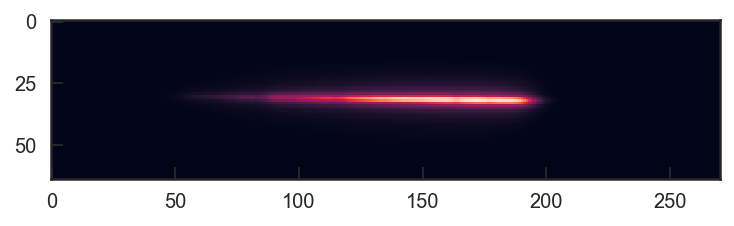

In [19]:
plt.imshow(co.beam.model)

In [71]:
## Extract the model (error array here is meaningless)
w, f, e = co.beam.optimal_extract(co.beam.model, bin=0)

In [72]:
ifl = interp1d(w,f/ffl)(wv)

In [46]:
def Scale_model(D, sig, M):
    C = np.sum(((D * M) / sig ** 2)) / np.sum((M ** 2 / sig ** 2))
    return C

In [73]:
##Scale model
C = Scale_model(flx, err,ifl)

(0, 7.5e-18)

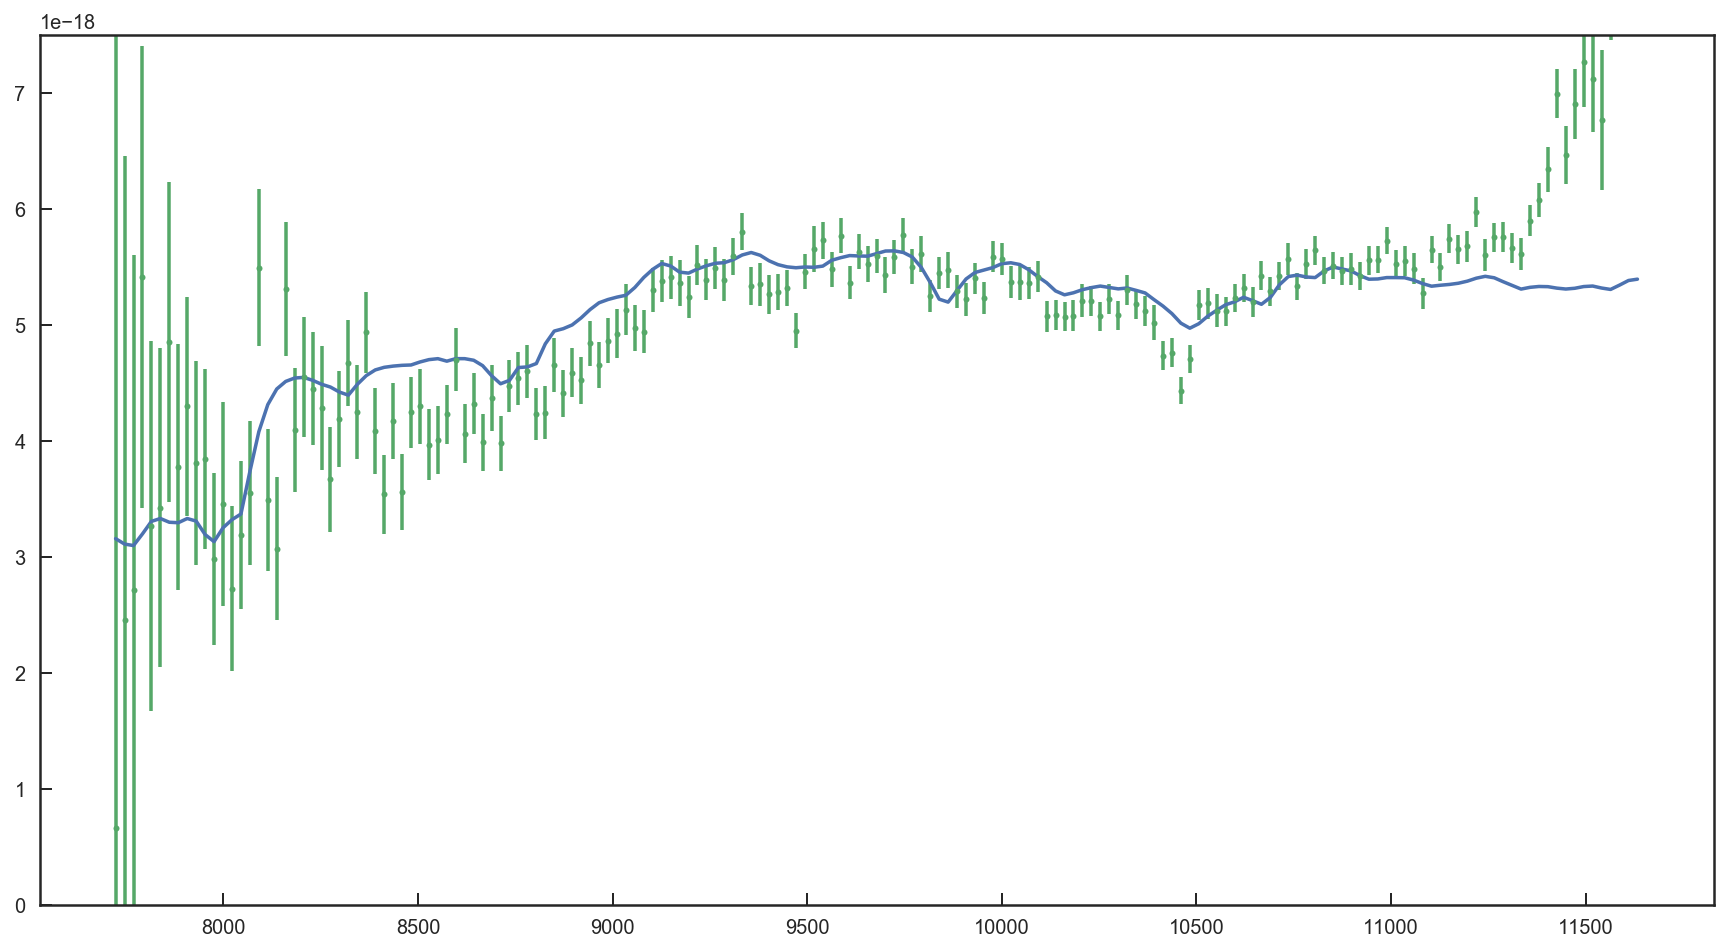

In [75]:
plt.figure(figsize=[15,8])

plt.plot(wv,C*ifl)
plt.errorbar(wv,flx,err,linestyle='None', marker='o', markersize=3)
plt.ylim(0,0.75E-17)

In [23]:
spec = fits.open('/Users/vestrada/Github/Quiescent_analysis/Grizli_extract/ForVince/j033239-274648_39170.1D.fits')